<a href="https://colab.research.google.com/github/lilasch/Facial_Attribute_CNN/blob/main/basicmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facial Attribute Classification**

Lila Schisgal and Phoebe Jeske


First, we import our data from two text files and partition it into training and validation data.

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
import tensorflow
import pandas as pd
import cv2
import numpy as np
import glob

# Load attributes csv
attributes = pd.read_csv("list_attr_celeba.txt", skiprows = 1, delimiter="\s+|\t")

# Load csv with partitions values
partitions = pd.read_csv("list_eval_partition.txt", delimiter="\s+|\t", header = None)

partitions.columns = ['image_name', 'dataset'] # setting column header names for partitions
attributes['dataset'] = partitions['dataset'].values # copying the partition values into the attributes df


Mounted at /content/drive


<ipython-input-53-c78c5ea5c41d>:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  attributes = pd.read_csv("/content/drive/MyDrive/list_attr_celeba.txt", skiprows = 1, delimiter="\s+|\t")
<ipython-input-53-c78c5ea5c41d>:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  partitions = pd.read_csv("/content/drive/MyDrive/list_eval_partition.txt", delimiter="\s+|\t", header = None)


In [ ]:
# unzipping image data
import zipfile
zippath = 'img_align_celeba.zip'
targetfolder = 'all_images'

with zipfile.ZipFile(zippath, 'r') as zip_ref:
    zip_ref.extractall(targetfolder)

In [ ]:
# filter so just the eyeglasses attribute is included
glasses_df = attributes.iloc[:, [15, 40]] # 40 attributes

In [ ]:
# the image filenames need to be in their own column
glasses_df = glasses_df.reset_index()

In [ ]:
# from sklearn.model_selection import train_test_split

# rename columns
glasses_df.rename(columns={'index': 'image_names'}, inplace=True)
glasses_df.rename(columns={'Eyeglasses': 'eyeglasses_or_not'}, inplace=True)

# splitting the data
train = glasses_df[glasses_df['dataset'] == 0]
train.drop(columns='dataset', inplace=True)
valid = glasses_df[glasses_df['dataset'] == 1]
valid.drop(columns='dataset', inplace=True)
test = glasses_df[glasses_df['dataset'] == 2]
test.drop(columns='dataset', inplace=True)

'''
train_labels = train.loc[:,'eyeglasses_or_not']
valid_labels = valid.loc[:,'eyeglasses_or_not']
test_labels = test.loc[:,'eyeglasses_or_not']
y_train=keras.utils.to_categorical(train_labels)
y_valid=keras.utils.to_categorical(valid_labels)
y_test=keras.utils.to_categorical(test_labels)'''

<ipython-input-56-fa326fac323d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns='dataset', inplace=True)
<ipython-input-56-fa326fac323d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.drop(columns='dataset', inplace=True)
<ipython-input-56-fa326fac323d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns='dataset', inplace=True)


"\ntrain_labels = train.loc[:,'eyeglasses_or_not']\nvalid_labels = valid.loc[:,'eyeglasses_or_not']\ntest_labels = test.loc[:,'eyeglasses_or_not']\ny_train=keras.utils.to_categorical(train_labels)\ny_valid=keras.utils.to_categorical(valid_labels)\ny_test=keras.utils.to_categorical(test_labels)"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator() # ImageDataGenerator for train
valid_datagen = ImageDataGenerator() # ImageDataGenerator for valid

train["eyeglasses_or_not"] = train["eyeglasses_or_not"].astype('str') # requires target in string format
valid["eyeglasses_or_not"] = valid["eyeglasses_or_not"].astype('str')

train_generator = train_datagen.flow_from_dataframe(dataframe=train,
                                              directory='all_images/img_align_celeba/',
                                              x_col="image_names",
                                              y_col="eyeglasses_or_not",
                                              subset="training",
                                              class_mode="binary",
                                              batch_size=64,
                                              rescale=1.0/255,
                                              target_size=(109,89)
                                              )

valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid,
                                              directory='all_images/img_align_celeba/',
                                              x_col="image_names",
                                              y_col="eyeglasses_or_not",
                                              class_mode="binary",
                                              batch_size=64,
                                              rescale=1.0/255,
                                              target_size=(109,89)
                                              )

<ipython-input-61-6f77becb2fd9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["eyeglasses_or_not"] = train["eyeglasses_or_not"].astype('str') # requires target in string format
<ipython-input-61-6f77becb2fd9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["eyeglasses_or_not"] = valid["eyeglasses_or_not"].astype('str')


Found 162770 validated image filenames belonging to 2 classes.
Found 19867 validated image filenames belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(109, 89, 3)))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Flatten())
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 109, 89, 75)       2100      
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 89, 50)       33800     
                                                                 
 flatten_15 (Flatten)        (None, 485050)            0         
                                                                 
 dense_33 (Dense)            (None, 32)                15521632  
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 15557565 (59.35 MB)
Trainable params: 15557565 (59.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit_generator(generator=train_generator,
          epochs=20,
          steps_per_epoch=train.shape[0]//64,
          validation_data=valid_generator,
          validation_steps=valid.shape[0]//64,
          verbose=1)

<ipython-input-63-10047e0ea62a>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


Epoch 1/20
1110/2543 [============>.................] - ETA: 1:17:21 - loss: 1.4382 - accuracy: 0.9346

DEFUNCT CODE BELOW:

We then separate our target y values and image filenames in preparation for accessing the actual images as vectors.

In [ ]:
# Fit
history = model.fit(x_train,
                    y_train,
                    epochs=25,
                    validation_data=(x_valid,y_valid),
                    batch_size=32,
                    verbose=1)

# '''
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=5,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

# network_history_std = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),
#                                 epochs=1000000000, callbacks=[early_stopping])'''

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/accuracy_metrics.py", line 459, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 969, in sparse_categorical_matches
        matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())

    ValueError: Dimensions must be equal, but are 2 and 178 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](IteratorGetNext:1, Cast_1)' with input shapes: [?,2], [?,218,178].


In [ ]:
import shutil

# getting our image file names in three arrays
# train_files = train_df.index
# valid_files = valid_df.index
# test_files = test_df.index


image_folder = "/content/all_images/img_align_celeba"
valid_folder = "/content/drive/MyDrive/valid_images"
train_folder = "/content/drive/MyDrive/train_images"
test_folder = "/content/drive/MyDrive/test_images"

In [ ]:
import os

# Function to split images based on classification
def split_images(source_folder):
    files = os.listdir()  # Get the list of files in the source_folder
    for file in files:
        if file in train_files:
            if not os.path.exists(os.path.join(train_folder, file)):
                shutil.move(os.path.join(source_folder, file), os.path.join(train_folder, file))
        elif file in valid_files:
              if not os.path.exists(os.path.join(valid_folder, file)):
                  shutil.move(os.path.join(source_folder, file), os.path.join(valid_folder, file))
        elif file in test_files:
              if not os.path.exists(os.path.join(test_folder, file)):
                  shutil.move(os.path.join(source_folder, file), os.path.join(test_folder, file))


split_images(image_folder)

Next: need to access the images from the dataset and put them into a set of vectors.

In [ ]:
from re import X
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# separating out target values
y_train = train_df['Eyeglasses']
y_valid = valid_df['Eyeglasses']
y_test = test_df['Eyeglasses']

# getting x_train and y_train as separate arrays
x_train = train_df.index.to_numpy()
y_train = y_train.values

# building a dataframe for training data
train_df = pd.DataFrame(columns=['image_name','eyeglasses_or_not'])
train_df['image_name'] = x_train
train_df['eyeglasses_or_not'] = y_train

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Now, for the ImageDataGenerator:

Found 0 validated image filenames belonging to 0 classes.
(0, 256, 256, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 162770 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


TypeError: Invalid shape (0, 256, 256, 3) for image data

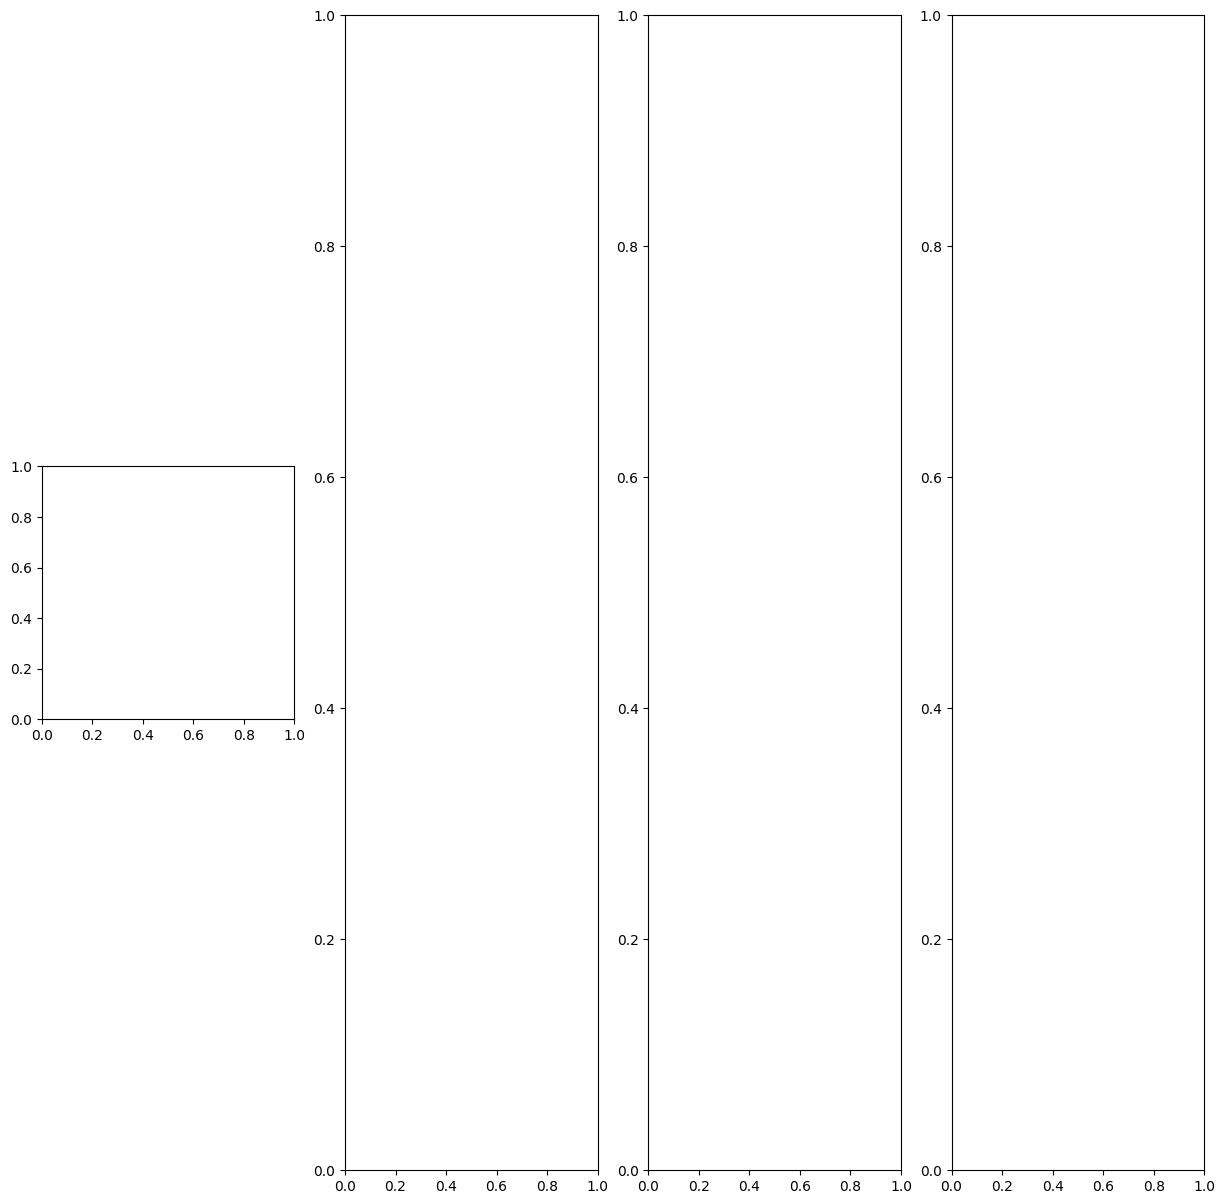

In [ ]:
'''
# plotting images
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):

  # convert to unsigned integers for plotting
  image = next(train_generator_df)[0].astype('uint8')

  # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
  image = np.squeeze(image)

  # plot raw pixel data
  ax[i].imshow(image)
  ax[i].axis('off')'''

'''
# Function to normalize images
def normalize_images(image_path):
    save_array = []
    for filename in os.listdir(image_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_path, filename)
            img = Image.open(img_path)
            img_array = np.array(img)
            flattened_dim = 218 * 178 * 3
            img_processed = img_array.reshape(-1, flattened_dim)
            img_processed = img_processed.astype(float)
            save_array.append(img_processed)
    return save_array

def standardize(train, test, valid):
    mean = np.mean(train)
    std = np.std(train)

    train = (train - mean)/std
    valid = (valid - mean)/std
    test = (test - mean)/std

    return train, test, valid

# Apply preprocessing steps
valid_images = normalize_images(valid_folder)'''

In [ ]:
# test_images = normalize_images(test_folder)


In [ ]:
# train_images = normalize_images(train_folder)

In [ ]:
# x_train, x_test, x_valid = standardize(train_images, test_images, valid_images)


In [ ]:
eval = model.evaluate(x_test,y_test)
print("Test loss:",eval[0])
print("Test accuracy:",eval[1])